In [1]:
#!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.9 MB/s eta 0:00:00


In [16]:
#!pip install seaborn

In [2]:
#!pip install windrose

In [3]:

#Import Libraries
import os
import sys
import fastf1
try:
    fastf1.Cache.enable_cache(sys.path[0]+"/fastf1_cache")
except:
    os.makedirs(sys.path[0]+"/fastf1_cache")
    fastf1.Cache.enable_cache(sys.path[0]+"/fastf1_cache")
from fastf1 import plotting
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import datetime
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
from windrose import WindroseAxes
pd.set_option('display.max_columns', None)



Загрузка гонки (ввод страны и год)

In [4]:
# Ввод гонки ,секции,страны
year = 2024
location = 'Monza'
session = 'R'

# get session
"""
    session identifier:
    'FP1'-1тренировка, 'FP2'-1тренировка, 'FP3'-3тренировка, 'Q'-квалификация, 'S'- гонка(спринт), 'SQ'-квалификацияспринт , 'R- гонка
    'Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Sprint', 'Sprint Qualifying', 'Sprint Shootout', 'Race'
"""

race = fastf1.get_session(year, location, session)
race.load(weather=True)

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

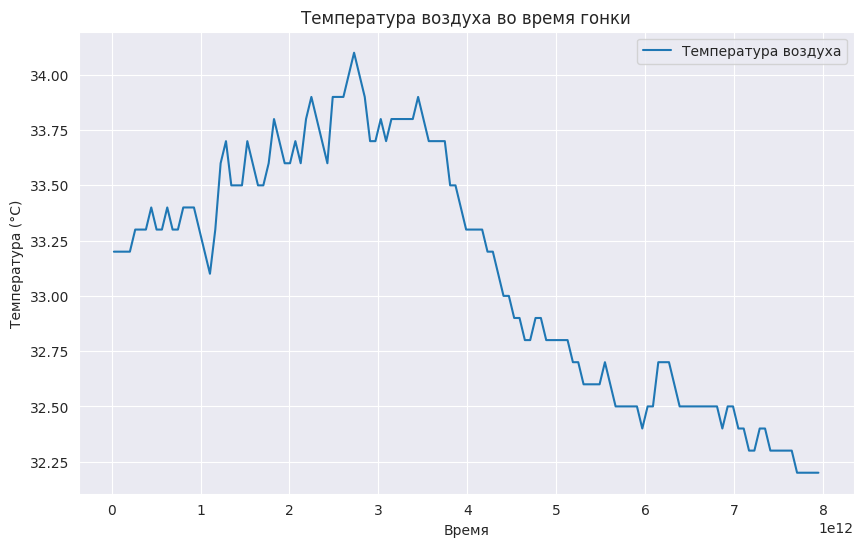

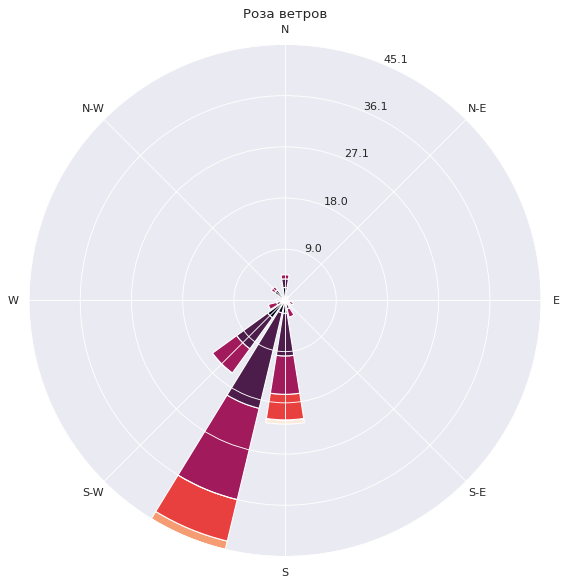

In [7]:
# Загружаем данные о погоде
weather_data = race.weather_data # Use the race object instead of the session string

# Визуализация температуры воздуха
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Time'], weather_data['AirTemp'], label='Температура воздуха')
plt.title("Температура воздуха во время гонки")
plt.xlabel("Время")
plt.ylabel("Температура (°C)")
plt.legend()
plt.show()

# Визуализация розы ветров
ax = WindroseAxes.from_ax()
ax.bar(weather_data['WindDirection'], weather_data['WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Роза ветров")
plt.show()

In [12]:
# Загружаем данные сессии гонки (Гран-при Монцы 2024 года, гонка)
session = fastf1.get_session(2024, 'Monza', 'R') # Use fastf1 instead of f1
session.load(telemetry=True)  # Загружаем данные телеметрии

# Извлекаем данные о погоде для каждого круга
weather_data = session.laps.get_weather_data()

# Преобразуем данные в формат DataFrame для лучшего отображения
weather_df = pd.DataFrame(weather_data)

# Выводим таблицу с данными о погоде и ветре
print(weather_df.head())  # Отображаем первые  5 строк для п

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

                      Time AirTemp Humidity Pressure Rainfall TrackTemp  \
56  0 days 00:56:26.384000    33.8     32.0    993.2    False      51.3   
57  0 days 00:57:26.393000    33.9     31.0    993.2    False      50.5   
59  0 days 00:59:26.375000    33.7     30.0    993.3    False      50.6   
60  0 days 01:00:26.383000    33.7     31.0    993.2    False      50.6   
62  0 days 01:02:26.388000    33.7     31.0    993.2    False      50.6   

   WindDirection WindSpeed  
56           191       1.9  
57           218       1.4  
59           185       2.3  
60           201       1.9  
62           194       1.8  


   DriverNumber BroadcastName Abbreviation         TeamName  Position  \
16           16     C LECLERC          LEC          Ferrari       1.0   
81           81     O PIASTRI          PIA          McLaren       2.0   
4             4      L NORRIS          NOR          McLaren       3.0   
55           55       C SAINZ          SAI          Ferrari       4.0   
44           44    L HAMILTON          HAM         Mercedes       5.0   
1             1  M VERSTAPPEN          VER  Red Bull Racing       6.0   
63           63     G RUSSELL          RUS         Mercedes       7.0   
11           11       S PEREZ          PER  Red Bull Racing       8.0   
23           23       A ALBON          ALB         Williams       9.0   
20           20   K MAGNUSSEN          MAG     Haas F1 Team      10.0   
14           14      F ALONSO          ALO     Aston Martin      11.0   
43           43   F COLAPINTO          COL         Williams      12.0   
3             3   D RICCIARDO          RIC         

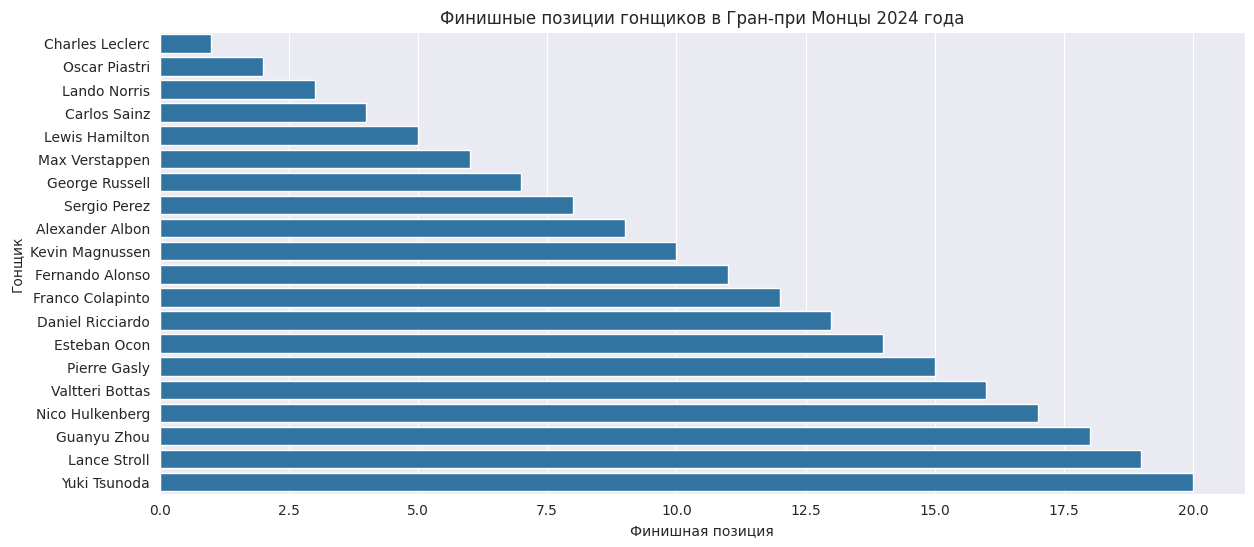


Гонщик: LEC
    LapNumber                LapTime            Sector1Time  \
0         1.0 0 days 00:01:28.179000                    NaT   
1         2.0 0 days 00:01:25.396000 0 days 00:00:27.707000   
2         3.0 0 days 00:01:25.179000 0 days 00:00:27.679000   
3         4.0 0 days 00:01:24.810000 0 days 00:00:27.653000   
4         5.0 0 days 00:01:24.603000 0 days 00:00:27.630000   
5         6.0 0 days 00:01:24.663000 0 days 00:00:27.596000   
6         7.0 0 days 00:01:24.434000 0 days 00:00:27.645000   
7         8.0 0 days 00:01:24.569000 0 days 00:00:27.557000   
8         9.0 0 days 00:01:24.362000 0 days 00:00:27.542000   
9        10.0 0 days 00:01:24.432000 0 days 00:00:27.515000   
10       11.0 0 days 00:01:24.846000 0 days 00:00:27.633000   
11       12.0 0 days 00:01:24.916000 0 days 00:00:27.680000   
12       13.0 0 days 00:01:25.529000 0 days 00:00:27.812000   
13       14.0 0 days 00:01:25.606000 0 days 00:00:27.839000   
14       15.0 0 days 00:01:30.192000 0 day

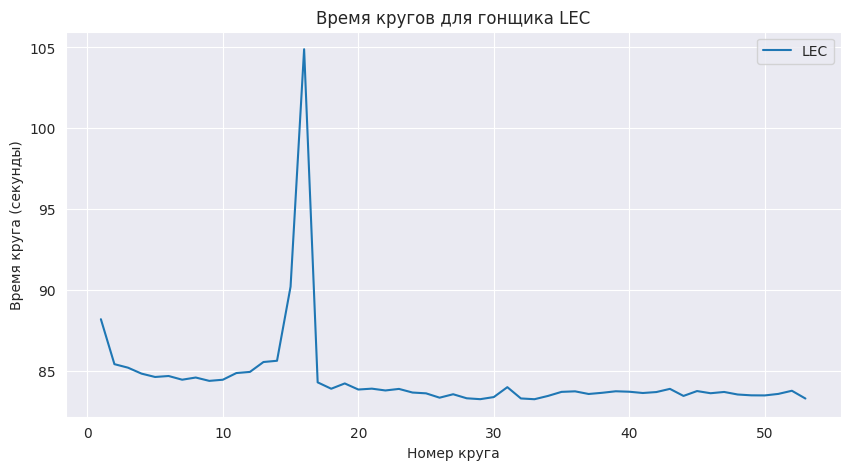


Гонщик: PIA
     LapNumber                LapTime            Sector1Time  \
53         1.0 0 days 00:01:27.623000                    NaT   
54         2.0 0 days 00:01:25.116000 0 days 00:00:27.751000   
55         3.0 0 days 00:01:25.261000 0 days 00:00:27.670000   
56         4.0 0 days 00:01:24.695000 0 days 00:00:27.672000   
57         5.0 0 days 00:01:24.660000 0 days 00:00:27.702000   
58         6.0 0 days 00:01:24.603000 0 days 00:00:27.799000   
59         7.0 0 days 00:01:24.418000 0 days 00:00:27.738000   
60         8.0 0 days 00:01:24.570000 0 days 00:00:27.665000   
61         9.0 0 days 00:01:24.375000 0 days 00:00:27.637000   
62        10.0 0 days 00:01:24.077000 0 days 00:00:27.687000   
63        11.0 0 days 00:01:24.247000 0 days 00:00:27.600000   
64        12.0 0 days 00:01:24.748000 0 days 00:00:27.848000   
65        13.0 0 days 00:01:24.670000 0 days 00:00:27.747000   
66        14.0 0 days 00:01:25.048000 0 days 00:00:27.812000   
67        15.0 0 days 00:01

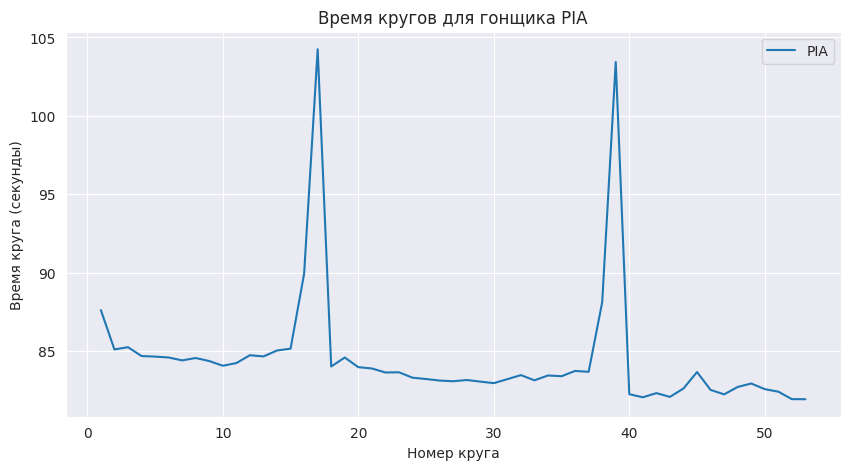


Гонщик: NOR
     LapNumber                LapTime            Sector1Time  \
106        1.0 0 days 00:01:28.971000                    NaT   
107        2.0 0 days 00:01:25.458000 0 days 00:00:27.676000   
108        3.0 0 days 00:01:25.110000 0 days 00:00:27.513000   
109        4.0 0 days 00:01:25.168000 0 days 00:00:27.638000   
110        5.0 0 days 00:01:24.674000 0 days 00:00:27.524000   
111        6.0 0 days 00:01:24.768000 0 days 00:00:27.750000   
112        7.0 0 days 00:01:24.531000 0 days 00:00:27.587000   
113        8.0 0 days 00:01:24.674000 0 days 00:00:27.651000   
114        9.0 0 days 00:01:24.664000 0 days 00:00:27.658000   
115       10.0 0 days 00:01:24.391000 0 days 00:00:27.540000   
116       11.0 0 days 00:01:24.448000 0 days 00:00:27.574000   
117       12.0 0 days 00:01:24.655000 0 days 00:00:27.666000   
118       13.0 0 days 00:01:25.359000 0 days 00:00:27.854000   
119       14.0 0 days 00:01:29.417000 0 days 00:00:27.752000   
120       15.0 0 days 00:01

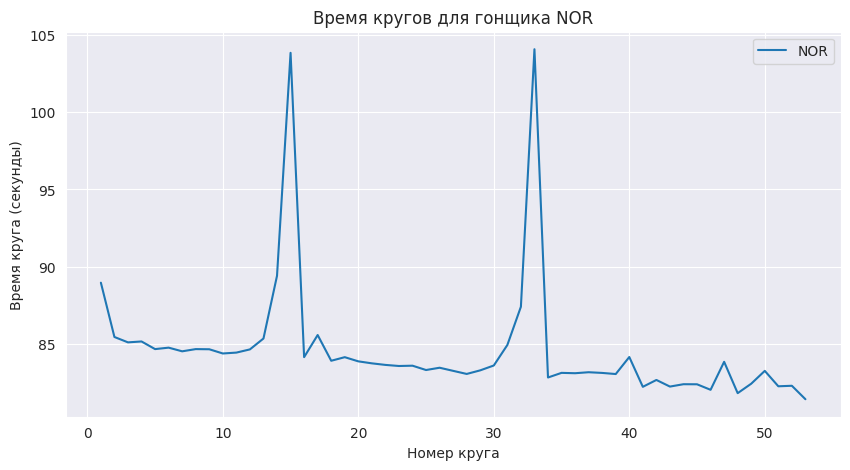


Гонщик: SAI
     LapNumber                LapTime            Sector1Time  \
159        1.0 0 days 00:01:29.345000                    NaT   
160        2.0 0 days 00:01:25.731000 0 days 00:00:27.553000   
161        3.0 0 days 00:01:25.358000 0 days 00:00:27.447000   
162        4.0 0 days 00:01:25.086000 0 days 00:00:27.435000   
163        5.0 0 days 00:01:25.006000 0 days 00:00:27.585000   
164        6.0 0 days 00:01:24.642000 0 days 00:00:27.639000   
165        7.0 0 days 00:01:24.715000 0 days 00:00:27.527000   
166        8.0 0 days 00:01:24.870000 0 days 00:00:27.744000   
167        9.0 0 days 00:01:24.774000 0 days 00:00:27.599000   
168       10.0 0 days 00:01:24.684000 0 days 00:00:27.579000   
169       11.0 0 days 00:01:25.066000 0 days 00:00:27.742000   
170       12.0 0 days 00:01:25.276000 0 days 00:00:27.710000   
171       13.0 0 days 00:01:25.423000 0 days 00:00:27.761000   
172       14.0 0 days 00:01:25.234000 0 days 00:00:27.701000   
173       15.0 0 days 00:01

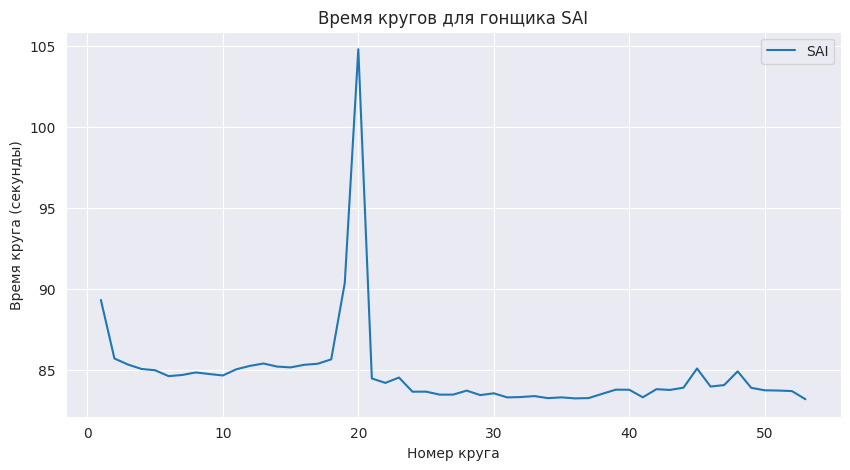


Гонщик: HAM
     LapNumber                LapTime            Sector1Time  \
212        1.0 0 days 00:01:29.674000                    NaT   
213        2.0 0 days 00:01:26.043000 0 days 00:00:27.701000   
214        3.0 0 days 00:01:25.630000 0 days 00:00:27.495000   
215        4.0 0 days 00:01:25.722000 0 days 00:00:27.650000   
216        5.0 0 days 00:01:24.771000 0 days 00:00:27.451000   
217        6.0 0 days 00:01:24.919000 0 days 00:00:27.565000   
218        7.0 0 days 00:01:25.205000 0 days 00:00:27.635000   
219        8.0 0 days 00:01:24.871000 0 days 00:00:27.605000   
220        9.0 0 days 00:01:25.035000 0 days 00:00:27.790000   
221       10.0 0 days 00:01:24.909000 0 days 00:00:27.537000   
222       11.0 0 days 00:01:24.938000 0 days 00:00:27.640000   
223       12.0 0 days 00:01:24.932000 0 days 00:00:27.672000   
224       13.0 0 days 00:01:25.329000 0 days 00:00:27.618000   
225       14.0 0 days 00:01:25.817000 0 days 00:00:27.774000   
226       15.0 0 days 00:01

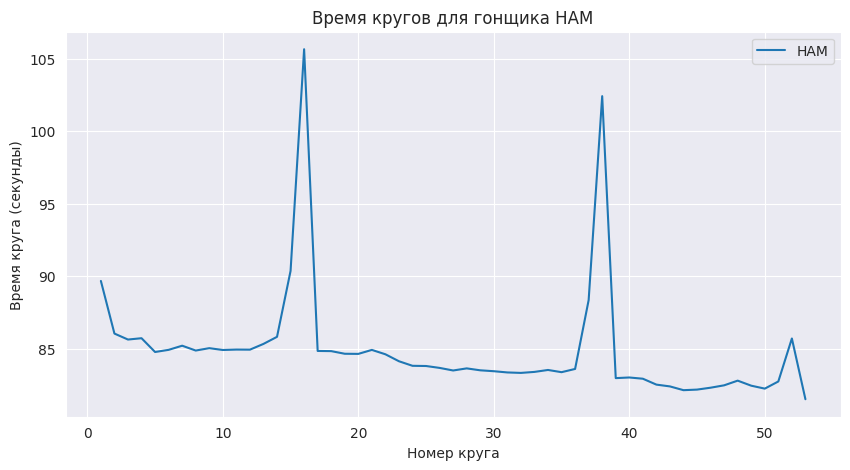


Гонщик: VER
     LapNumber                LapTime            Sector1Time  \
265        1.0 0 days 00:01:30.354000                    NaT   
266        2.0 0 days 00:01:26.170000 0 days 00:00:28.048000   
267        3.0 0 days 00:01:25.855000 0 days 00:00:27.731000   
268        4.0 0 days 00:01:25.633000 0 days 00:00:27.884000   
269        5.0 0 days 00:01:25.218000 0 days 00:00:27.721000   
270        6.0 0 days 00:01:25.096000 0 days 00:00:27.832000   
271        7.0 0 days 00:01:25.042000 0 days 00:00:27.771000   
272        8.0 0 days 00:01:24.918000 0 days 00:00:27.712000   
273        9.0 0 days 00:01:25.050000 0 days 00:00:27.909000   
274       10.0 0 days 00:01:24.964000 0 days 00:00:27.820000   
275       11.0 0 days 00:01:24.978000 0 days 00:00:27.799000   
276       12.0 0 days 00:01:24.968000 0 days 00:00:27.821000   
277       13.0 0 days 00:01:24.957000 0 days 00:00:27.806000   
278       14.0 0 days 00:01:25.287000 0 days 00:00:27.749000   
279       15.0 0 days 00:01

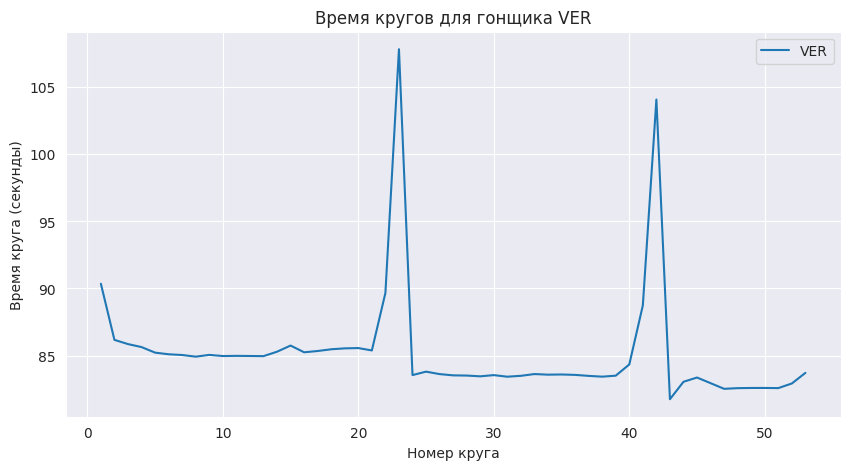


Гонщик: RUS
     LapNumber                LapTime            Sector1Time  \
318        1.0 0 days 00:01:31.512000                    NaT   
319        2.0 0 days 00:01:26.055000 0 days 00:00:27.760000   
320        3.0 0 days 00:01:25.733000 0 days 00:00:27.459000   
321        4.0 0 days 00:01:25.762000 0 days 00:00:27.611000   
322        5.0 0 days 00:01:25.494000 0 days 00:00:27.579000   
323        6.0 0 days 00:01:25.101000 0 days 00:00:27.434000   
324        7.0 0 days 00:01:25.046000 0 days 00:00:27.433000   
325        8.0 0 days 00:01:25.216000 0 days 00:00:27.494000   
326        9.0 0 days 00:01:25.115000 0 days 00:00:27.487000   
327       10.0 0 days 00:01:25.468000 0 days 00:00:27.438000   
328       11.0 0 days 00:01:31.175000 0 days 00:00:28.145000   
329       12.0 0 days 00:01:53.412000 0 days 00:00:56.118000   
330       13.0 0 days 00:01:24.546000 0 days 00:00:27.530000   
331       14.0 0 days 00:01:24.548000 0 days 00:00:27.378000   
332       15.0 0 days 00:01

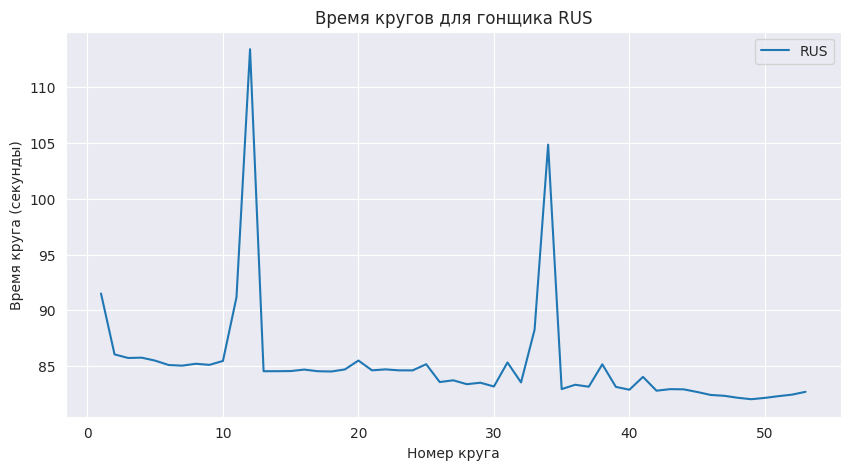


Гонщик: PER
     LapNumber                LapTime            Sector1Time  \
371        1.0 0 days 00:01:31.698000                    NaT   
372        2.0 0 days 00:01:26.411000 0 days 00:00:27.938000   
373        3.0 0 days 00:01:25.757000 0 days 00:00:27.641000   
374        4.0 0 days 00:01:25.805000 0 days 00:00:27.729000   
375        5.0 0 days 00:01:25.447000 0 days 00:00:27.791000   
376        6.0 0 days 00:01:25.105000 0 days 00:00:27.708000   
377        7.0 0 days 00:01:25.434000 0 days 00:00:27.540000   
378        8.0 0 days 00:01:25.186000 0 days 00:00:27.589000   
379        9.0 0 days 00:01:24.977000 0 days 00:00:27.531000   
380       10.0 0 days 00:01:24.841000 0 days 00:00:27.446000   
381       11.0 0 days 00:01:24.773000 0 days 00:00:27.488000   
382       12.0 0 days 00:01:24.654000 0 days 00:00:27.581000   
383       13.0 0 days 00:01:25.041000 0 days 00:00:27.678000   
384       14.0 0 days 00:01:25.229000 0 days 00:00:27.600000   
385       15.0 0 days 00:01

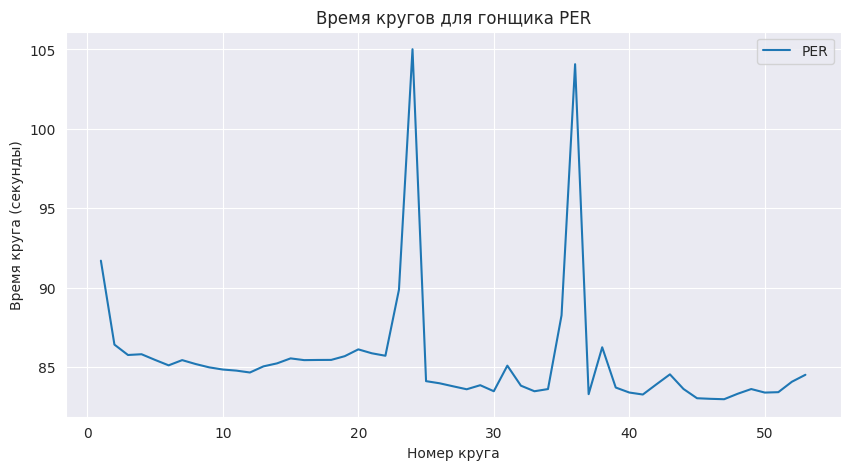


Гонщик: ALB
     LapNumber                LapTime            Sector1Time  \
424        1.0 0 days 00:01:31.965000                    NaT   
425        2.0 0 days 00:01:27.011000 0 days 00:00:28.097000   
426        3.0 0 days 00:01:26.282000 0 days 00:00:27.753000   
427        4.0 0 days 00:01:26.527000 0 days 00:00:27.873000   
428        5.0 0 days 00:01:26.039000 0 days 00:00:27.704000   
429        6.0 0 days 00:01:25.946000 0 days 00:00:27.696000   
430        7.0 0 days 00:01:25.990000 0 days 00:00:27.815000   
431        8.0 0 days 00:01:25.963000 0 days 00:00:27.800000   
432        9.0 0 days 00:01:25.666000 0 days 00:00:27.709000   
433       10.0 0 days 00:01:25.711000 0 days 00:00:27.728000   
434       11.0 0 days 00:01:25.734000 0 days 00:00:27.781000   
435       12.0 0 days 00:01:25.468000 0 days 00:00:27.873000   
436       13.0 0 days 00:01:25.533000 0 days 00:00:27.847000   
437       14.0 0 days 00:01:26.140000 0 days 00:00:27.867000   
438       15.0 0 days 00:01

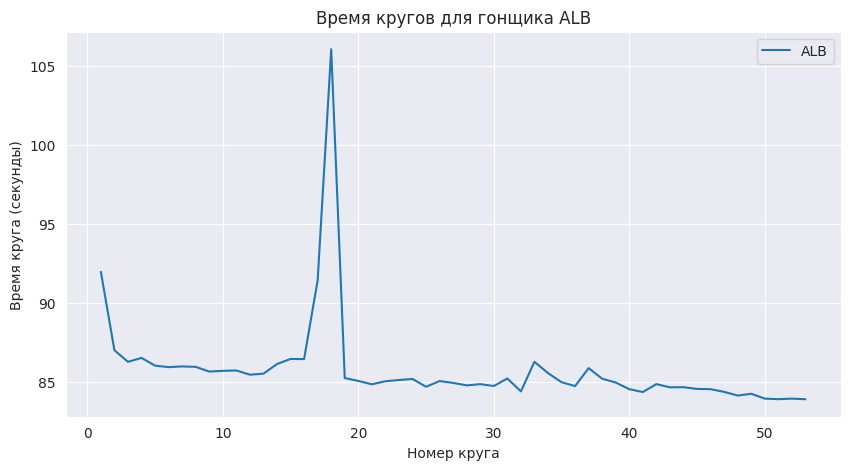


Гонщик: MAG
     LapNumber                LapTime            Sector1Time  \
477        1.0 0 days 00:01:33.931000                    NaT   
478        2.0 0 days 00:01:27.205000 0 days 00:00:28.017000   
479        3.0 0 days 00:01:26.584000 0 days 00:00:27.857000   
480        4.0 0 days 00:01:26.372000 0 days 00:00:27.705000   
481        5.0 0 days 00:01:26.142000 0 days 00:00:27.875000   
482        6.0 0 days 00:01:25.902000 0 days 00:00:27.751000   
483        7.0 0 days 00:01:25.825000 0 days 00:00:27.670000   
484        8.0 0 days 00:01:25.966000 0 days 00:00:27.831000   
485        9.0 0 days 00:01:25.785000 0 days 00:00:27.712000   
486       10.0 0 days 00:01:25.799000 0 days 00:00:27.539000   
487       11.0 0 days 00:01:26.040000 0 days 00:00:27.934000   
488       12.0 0 days 00:01:26.145000 0 days 00:00:27.890000   
489       13.0 0 days 00:01:26.286000 0 days 00:00:27.987000   
490       14.0 0 days 00:01:29.943000 0 days 00:00:27.850000   
491       15.0 0 days 00:01

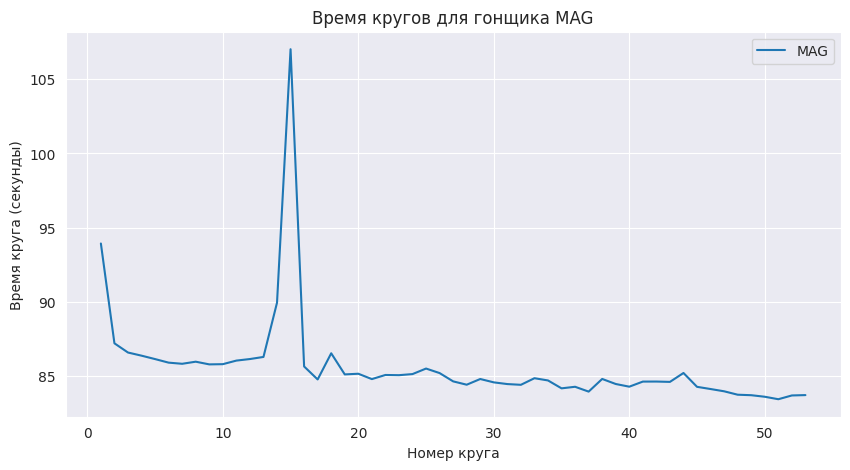


Гонщик: ALO
     LapNumber                LapTime            Sector1Time  \
530        1.0 0 days 00:01:32.411000                    NaT   
531        2.0 0 days 00:01:27.236000 0 days 00:00:28.200000   
532        3.0 0 days 00:01:26.410000 0 days 00:00:27.646000   
533        4.0 0 days 00:01:26.411000 0 days 00:00:27.728000   
534        5.0 0 days 00:01:26.218000 0 days 00:00:27.846000   
535        6.0 0 days 00:01:25.911000 0 days 00:00:27.675000   
536        7.0 0 days 00:01:25.950000 0 days 00:00:27.644000   
537        8.0 0 days 00:01:25.693000 0 days 00:00:27.692000   
538        9.0 0 days 00:01:25.969000 0 days 00:00:27.763000   
539       10.0 0 days 00:01:25.832000 0 days 00:00:27.776000   
540       11.0 0 days 00:01:25.758000 0 days 00:00:27.679000   
541       12.0 0 days 00:01:29.740000 0 days 00:00:27.725000   
542       13.0 0 days 00:01:45.594000 0 days 00:00:47.982000   
543       14.0 0 days 00:01:25.832000 0 days 00:00:28.319000   
544       15.0 0 days 00:01

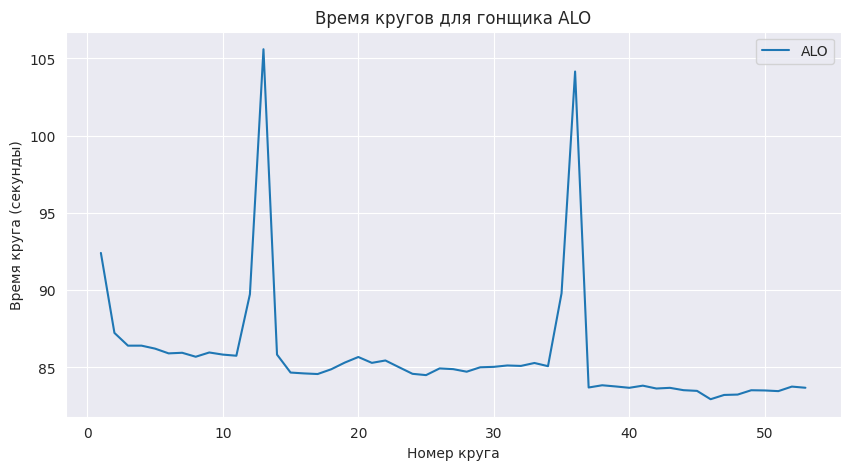


Гонщик: COL
     LapNumber                LapTime            Sector1Time  \
583        1.0 0 days 00:01:35.885000                    NaT   
584        2.0 0 days 00:01:27.845000 0 days 00:00:28.352000   
585        3.0 0 days 00:01:26.578000 0 days 00:00:27.636000   
586        4.0 0 days 00:01:26.250000 0 days 00:00:27.686000   
587        5.0 0 days 00:01:27.151000 0 days 00:00:27.685000   
588        6.0 0 days 00:01:26.057000 0 days 00:00:27.633000   
589        7.0 0 days 00:01:27.204000 0 days 00:00:28.513000   
590        8.0 0 days 00:01:26.385000 0 days 00:00:27.774000   
591        9.0 0 days 00:01:26.222000 0 days 00:00:27.779000   
592       10.0 0 days 00:01:26.289000 0 days 00:00:27.760000   
593       11.0 0 days 00:01:26.607000 0 days 00:00:27.883000   
594       12.0 0 days 00:01:26.500000 0 days 00:00:27.910000   
595       13.0 0 days 00:01:26.410000 0 days 00:00:27.900000   
596       14.0 0 days 00:01:26.930000 0 days 00:00:27.986000   
597       15.0 0 days 00:01

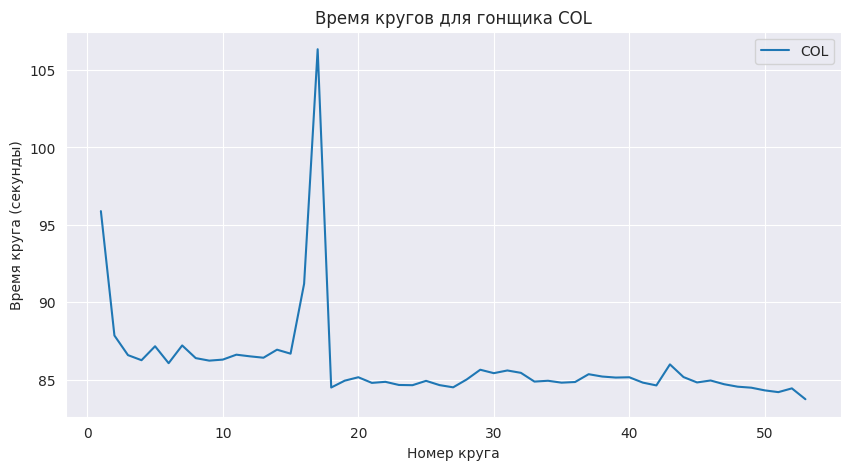


Гонщик: RIC
     LapNumber                LapTime            Sector1Time  \
636        1.0 0 days 00:01:33.104000                    NaT   
637        2.0 0 days 00:01:27.177000 0 days 00:00:27.871000   
638        3.0 0 days 00:01:26.588000 0 days 00:00:27.948000   
639        4.0 0 days 00:01:26.488000 0 days 00:00:27.785000   
640        5.0 0 days 00:01:26.251000 0 days 00:00:27.781000   
641        6.0 0 days 00:01:25.899000 0 days 00:00:27.725000   
642        7.0 0 days 00:01:25.713000 0 days 00:00:27.574000   
643        8.0 0 days 00:01:25.993000 0 days 00:00:27.754000   
644        9.0 0 days 00:01:25.815000 0 days 00:00:27.645000   
645       10.0 0 days 00:01:26.111000 0 days 00:00:27.654000   
646       11.0 0 days 00:01:31.962000 0 days 00:00:28.537000   
647       12.0 0 days 00:01:52.188000 0 days 00:00:53.859000   
648       13.0 0 days 00:01:26.122000 0 days 00:00:27.957000   
649       14.0 0 days 00:01:25.827000 0 days 00:00:27.740000   
650       15.0 0 days 00:01

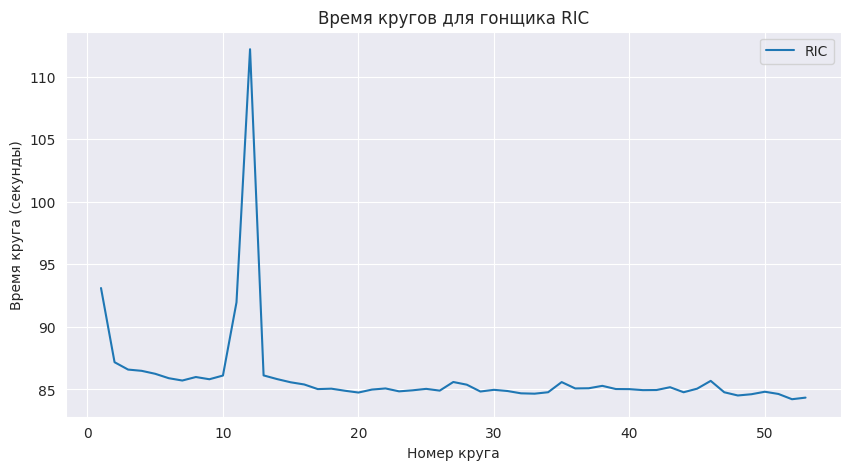


Гонщик: OCO
     LapNumber                LapTime            Sector1Time  \
689        1.0 0 days 00:01:35.432000                    NaT   
690        2.0 0 days 00:01:26.837000 0 days 00:00:27.923000   
691        3.0 0 days 00:01:26.466000 0 days 00:00:27.636000   
692        4.0 0 days 00:01:26.297000 0 days 00:00:27.645000   
693        5.0 0 days 00:01:26.568000 0 days 00:00:27.648000   
694        6.0 0 days 00:01:25.684000 0 days 00:00:27.537000   
695        7.0 0 days 00:01:26.006000 0 days 00:00:27.682000   
696        8.0 0 days 00:01:26.053000 0 days 00:00:27.615000   
697        9.0 0 days 00:01:25.369000 0 days 00:00:27.493000   
698       10.0 0 days 00:01:26.035000 0 days 00:00:27.667000   
699       11.0 0 days 00:01:26.349000 0 days 00:00:27.858000   
700       12.0 0 days 00:01:25.954000 0 days 00:00:27.772000   
701       13.0 0 days 00:01:26.059000 0 days 00:00:27.841000   
702       14.0 0 days 00:01:26.307000 0 days 00:00:27.993000   
703       15.0 0 days 00:01

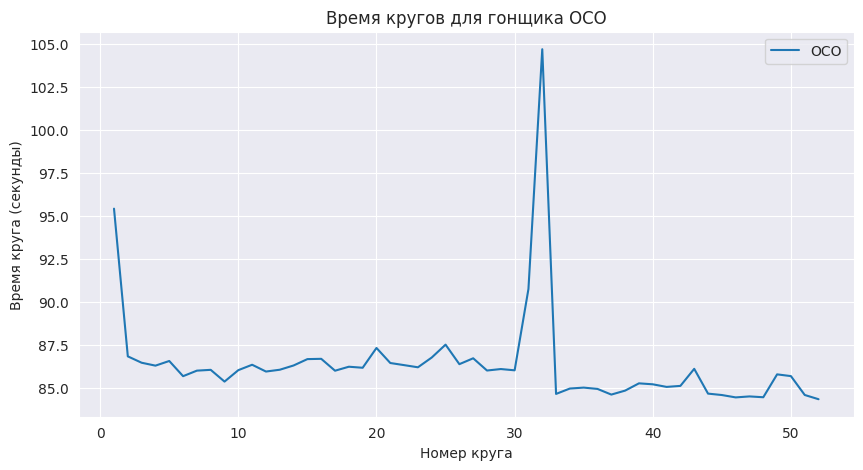


Гонщик: GAS
     LapNumber                LapTime            Sector1Time  \
741        1.0 0 days 00:01:34.873000                    NaT   
742        2.0 0 days 00:01:26.606000 0 days 00:00:28.039000   
743        3.0 0 days 00:01:26.646000 0 days 00:00:27.792000   
744        4.0 0 days 00:01:26.395000 0 days 00:00:27.727000   
745        5.0 0 days 00:01:26.361000 0 days 00:00:27.701000   
746        6.0 0 days 00:01:26.042000 0 days 00:00:27.701000   
747        7.0 0 days 00:01:25.820000 0 days 00:00:27.578000   
748        8.0 0 days 00:01:26.465000 0 days 00:00:27.820000   
749        9.0 0 days 00:01:27.148000 0 days 00:00:28.298000   
750       10.0 0 days 00:01:31.535000 0 days 00:00:28.279000   
751       11.0 0 days 00:01:45.677000 0 days 00:00:47.786000   
752       12.0 0 days 00:01:25.070000 0 days 00:00:27.865000   
753       13.0 0 days 00:01:24.816000 0 days 00:00:27.711000   
754       14.0 0 days 00:01:25.214000 0 days 00:00:27.635000   
755       15.0 0 days 00:01

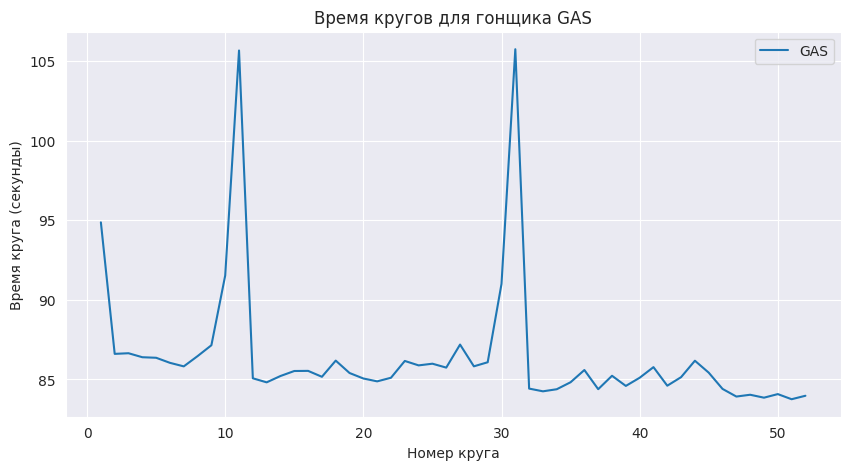


Гонщик: BOT
     LapNumber                LapTime            Sector1Time  \
793        1.0 0 days 00:01:36.375000                    NaT   
794        2.0 0 days 00:01:28.377000 0 days 00:00:28.513000   
795        3.0 0 days 00:01:26.918000 0 days 00:00:28.060000   
796        4.0 0 days 00:01:26.324000 0 days 00:00:27.719000   
797        5.0 0 days 00:01:28.242000 0 days 00:00:27.926000   
798        6.0 0 days 00:01:26.499000 0 days 00:00:28.073000   
799        7.0 0 days 00:01:26.359000 0 days 00:00:28.190000   
800        8.0 0 days 00:01:26.206000 0 days 00:00:28.050000   
801        9.0 0 days 00:01:26.188000 0 days 00:00:27.997000   
802       10.0 0 days 00:01:26.118000 0 days 00:00:28.035000   
803       11.0 0 days 00:01:26.470000 0 days 00:00:28.107000   
804       12.0 0 days 00:01:26.207000 0 days 00:00:28.073000   
805       13.0 0 days 00:01:26.349000 0 days 00:00:28.165000   
806       14.0 0 days 00:01:26.481000 0 days 00:00:28.236000   
807       15.0 0 days 00:01

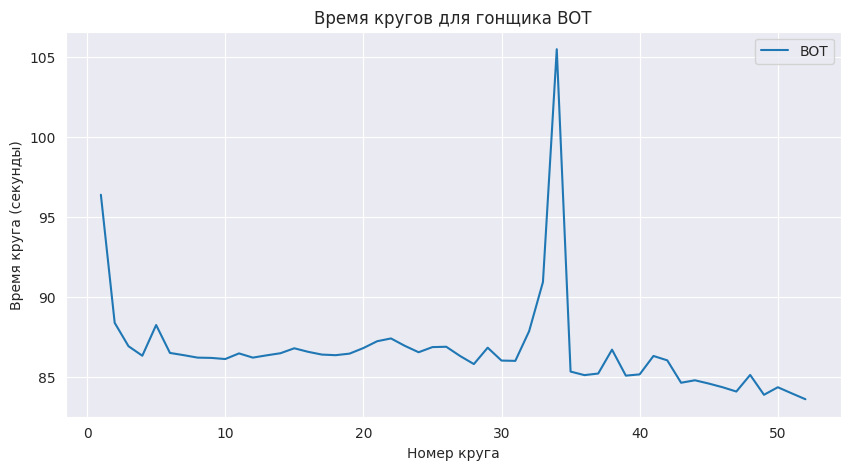


Гонщик: HUL
     LapNumber                LapTime            Sector1Time  \
845        1.0 0 days 00:01:35.519000                    NaT   
846        2.0 0 days 00:01:27.512000 0 days 00:00:28.557000   
847        3.0 0 days 00:01:26.434000 0 days 00:00:27.750000   
848        4.0 0 days 00:01:26.541000 0 days 00:00:27.663000   
849        5.0 0 days 00:01:31.729000 0 days 00:00:28.098000   
850        6.0 0 days 00:02:00.178000 0 days 00:01:01.963000   
851        7.0 0 days 00:01:25.882000 0 days 00:00:27.741000   
852        8.0 0 days 00:01:25.351000 0 days 00:00:27.613000   
853        9.0 0 days 00:01:25.191000 0 days 00:00:27.635000   
854       10.0 0 days 00:01:25.194000 0 days 00:00:27.683000   
855       11.0 0 days 00:01:25.322000 0 days 00:00:27.695000   
856       12.0 0 days 00:01:25.166000 0 days 00:00:27.705000   
857       13.0 0 days 00:01:24.983000 0 days 00:00:27.709000   
858       14.0 0 days 00:01:25.014000 0 days 00:00:27.670000   
859       15.0 0 days 00:01

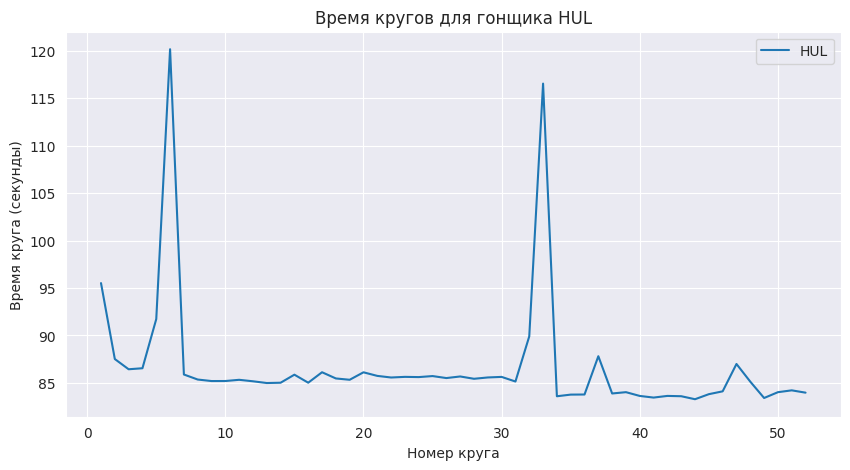


Гонщик: ZHO
     LapNumber                LapTime            Sector1Time  \
897        1.0 0 days 00:01:36.732000                    NaT   
898        2.0 0 days 00:01:28.721000 0 days 00:00:28.437000   
899        3.0 0 days 00:01:26.997000 0 days 00:00:27.856000   
900        4.0 0 days 00:01:26.226000 0 days 00:00:27.734000   
901        5.0 0 days 00:01:29.256000 0 days 00:00:27.948000   
902        6.0 0 days 00:01:25.942000 0 days 00:00:27.648000   
903        7.0 0 days 00:01:26.381000 0 days 00:00:27.955000   
904        8.0 0 days 00:01:26.411000 0 days 00:00:27.845000   
905        9.0 0 days 00:01:26.315000 0 days 00:00:27.980000   
906       10.0 0 days 00:01:26.128000 0 days 00:00:27.822000   
907       11.0 0 days 00:01:26.488000 0 days 00:00:28.011000   
908       12.0 0 days 00:01:26.348000 0 days 00:00:27.957000   
909       13.0 0 days 00:01:26.802000 0 days 00:00:27.971000   
910       14.0 0 days 00:01:27.092000 0 days 00:00:28.089000   
911       15.0 0 days 00:01

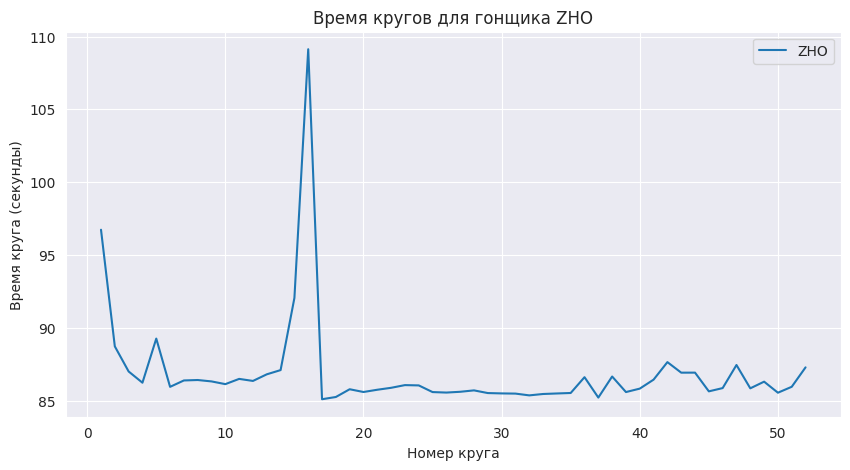


Гонщик: STR
      LapNumber                LapTime            Sector1Time  \
949         1.0 0 days 00:01:35.810000                    NaT   
950         2.0 0 days 00:01:28.342000 0 days 00:00:28.654000   
951         3.0 0 days 00:01:26.734000 0 days 00:00:27.671000   
952         4.0 0 days 00:01:26.253000 0 days 00:00:27.514000   
953         5.0 0 days 00:01:27.234000 0 days 00:00:27.636000   
954         6.0 0 days 00:01:25.558000 0 days 00:00:27.529000   
955         7.0 0 days 00:01:26.208000 0 days 00:00:28.114000   
956         8.0 0 days 00:01:25.799000 0 days 00:00:27.799000   
957         9.0 0 days 00:01:26.024000 0 days 00:00:27.777000   
958        10.0 0 days 00:01:26.182000 0 days 00:00:27.822000   
959        11.0 0 days 00:01:25.675000 0 days 00:00:27.691000   
960        12.0 0 days 00:01:25.947000 0 days 00:00:27.829000   
961        13.0 0 days 00:01:26.143000 0 days 00:00:27.742000   
962        14.0 0 days 00:01:25.895000 0 days 00:00:27.738000   
963        1

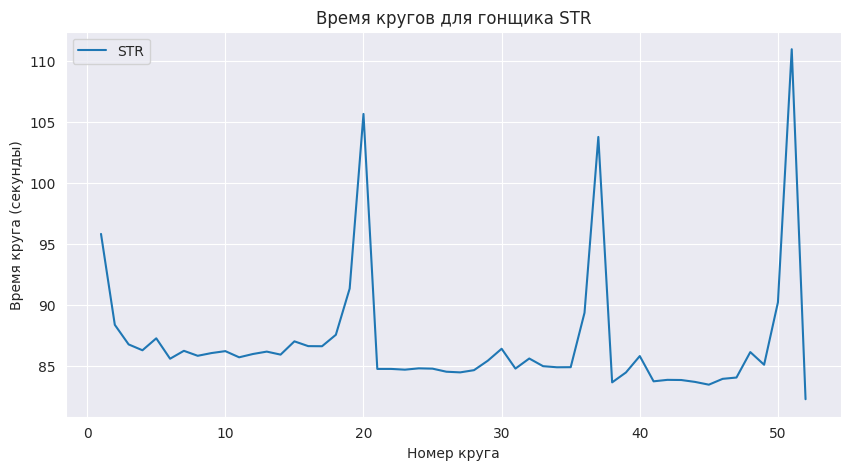


Гонщик: TSU
      LapNumber                LapTime            Sector1Time  \
1001        1.0 0 days 00:01:35.235000                    NaT   
1002        2.0 0 days 00:01:27.538000 0 days 00:00:28.414000   
1003        3.0 0 days 00:01:26.665000 0 days 00:00:27.756000   
1004        4.0 0 days 00:01:26.198000 0 days 00:00:27.631000   
1005        5.0 0 days 00:01:32.241000 0 days 00:00:28.736000   
1006        6.0 0 days 00:01:28.473000 0 days 00:00:28.426000   
1007        7.0 0 days 00:01:40.319000 0 days 00:00:28.469000   

                Sector2Time            Sector3Time  
1001 0 days 00:00:32.335000 0 days 00:00:30.339000  
1002 0 days 00:00:30.094000 0 days 00:00:29.030000  
1003 0 days 00:00:29.819000 0 days 00:00:29.090000  
1004 0 days 00:00:29.689000 0 days 00:00:28.878000  
1005 0 days 00:00:32.722000 0 days 00:00:30.783000  
1006 0 days 00:00:30.441000 0 days 00:00:29.606000  
1007 0 days 00:00:30.634000 0 days 00:00:41.216000  


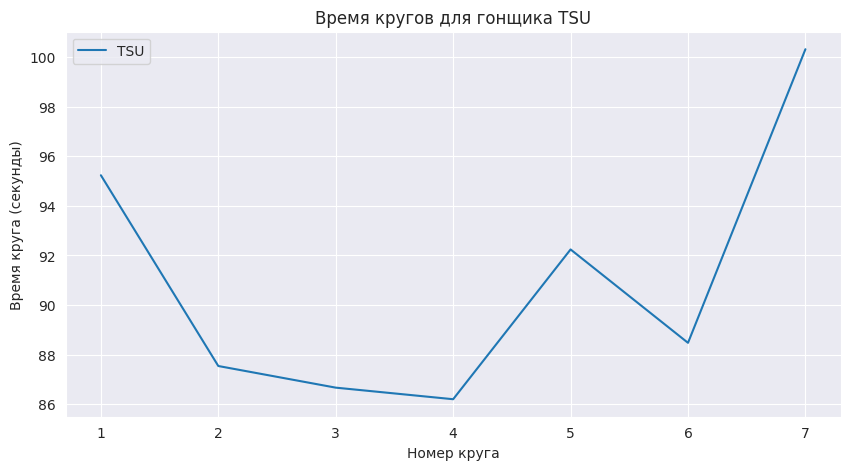

In [17]:
# Отображаем основные данные о результатах гонки
race_results = session.results # Assign the results to the race_results variable
print(race_results[['DriverNumber', 'BroadcastName', 'Abbreviation',
                    'TeamName', 'Position', 'GridPosition',
                    'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points']])

# Визуализируем позиции гонщиков на финише
plt.figure(figsize=(14, 6))
sns.barplot(x='Position', y='FullName', data=race_results.sort_values('Position'))
plt.title("Финишные позиции гонщиков в Гран-при Монцы 2024 года")
plt.xlabel("Финишная позиция")
plt.ylabel("Гонщик")
plt.show()

# Подробный анализ каждого гонщика
for driver in session.drivers:
    driver_laps = session.laps.pick_driver(driver)

    # Отображаем основные данные по кругам гонщика
    print(f"\nГонщик: {driver_laps['Driver'].iloc[0]}")
    print(driver_laps[['LapNumber', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', ]])

    # Визуализация времени кругов для каждого гонщика
    plt.figure(figsize=(10, 5))
    plt.plot(driver_laps['LapNumber'], driver_laps['LapTime'].dt.total_seconds(), label=driver_laps['Driver'].iloc[0])
    plt.title(f"Время кругов для гонщика {driver_laps['Driver'].iloc[0]}")
    plt.xlabel("Номер круга")
    plt.ylabel("Время круга (секунды)")
    plt.legend()
    plt.show()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

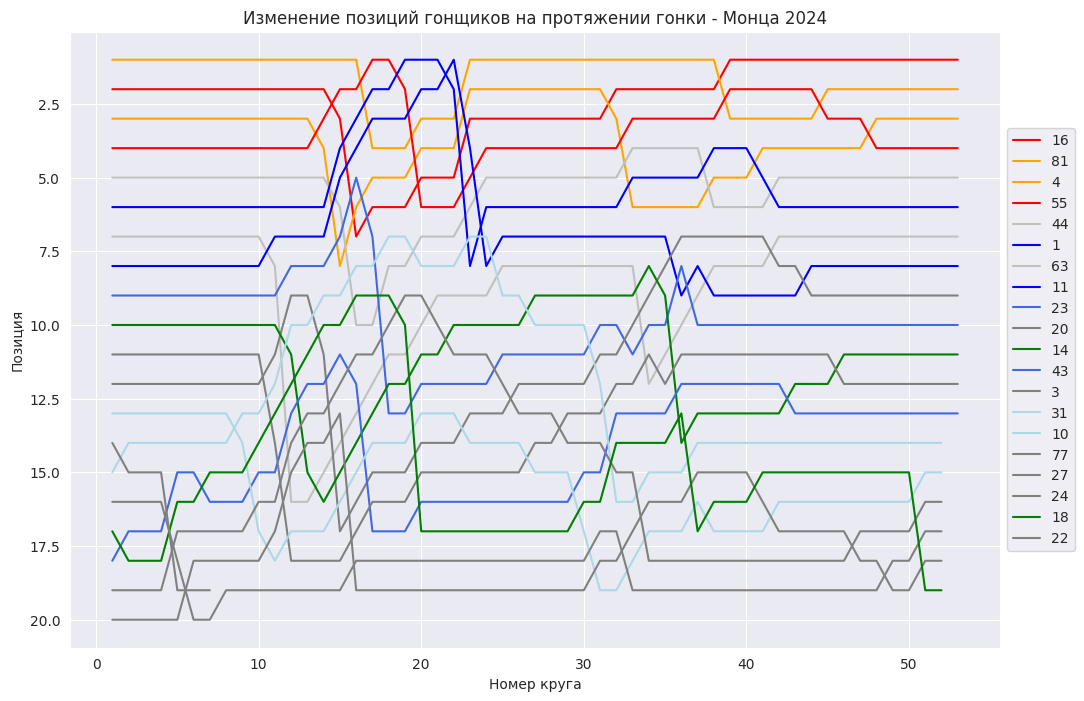

In [56]:
# Включаем кэш
fastf1.Cache.enable_cache('fastf1_cache')

# Загружаем данные о Гран-при Италии 2024 года (Монца)
race = fastf1.get_event(2024, 'Monza')

# Загружаем данные гоночной сессии
session = race.get_session('R')
session.load()

# Определяем цвета для каждой команды
team_colors = {
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Red Bull Racing': 'blue',
    'Mercedes': 'silver',
    'Aston Martin': 'green',
    'Alpine': 'lightblue',
    'AlphaTauri': 'darkblue',
    'Williams': 'royalblue',
    'Alfa Romeo': 'darkred',
    'Haas': 'black'
}

# Получаем все круги гонщиков
laps = session.laps

# Переходим к каждому кругу и извлекаем позицию каждого гонщика на каждом круге
positions = pd.DataFrame()

for drv in session.drivers:
    driver_laps = laps.pick_driver(drv)
    driver_laps['Driver'] = drv
    driver_laps['Team'] = driver_laps['Team']  # Добавляем данные о команде
    driver_positions = driver_laps[['LapNumber', 'Position', 'Driver', 'Team']]
    positions = pd.concat([positions, driver_positions])

# Теперь строим график изменения позиций гонщиков на протяжении гонки
plt.figure(figsize=(12, 8))

# Проходим по каждому уникальному гонщику и строим график по командам
for driver in positions['Driver'].unique():
    driver_data = positions[positions['Driver'] == driver]
    team_name = driver_data['Team'].iloc[0]  # Получаем название команды гонщика
    color = team_colors.get(team_name, 'gray')  # Получаем цвет команды, если нет — серый

    # Строим график для каждого гонщика
    plt.plot(driver_data['LapNumber'], driver_data['Position'], label=driver, color=color)

# Инвертируем ось Y, так как 1-я позиция выше 20-й
plt.gca().invert_yaxis()

plt.title("Изменение позиций гонщиков на протяжении гонки - Монца 2024")
plt.xlabel("Номер круга")
plt.ylabel("Позиция")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Легенда с именами гонщиков
plt.grid(True)
plt.show()

In [20]:


results = session.results.loc[:,['Abbreviation','TeamName', 'ClassifiedPosition', 'Points']]
print(results)

   Abbreviation         TeamName ClassifiedPosition  Points
16          LEC          Ferrari                  1    25.0
81          PIA          McLaren                  2    18.0
4           NOR          McLaren                  3    16.0
55          SAI          Ferrari                  4    12.0
44          HAM         Mercedes                  5    10.0
1           VER  Red Bull Racing                  6     8.0
63          RUS         Mercedes                  7     6.0
11          PER  Red Bull Racing                  8     4.0
23          ALB         Williams                  9     2.0
20          MAG     Haas F1 Team                 10     1.0
14          ALO     Aston Martin                 11     0.0
43          COL         Williams                 12     0.0
3           RIC               RB                 13     0.0
31          OCO           Alpine                 14     0.0
10          GAS           Alpine                 15     0.0
77          BOT      Kick Sauber        

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

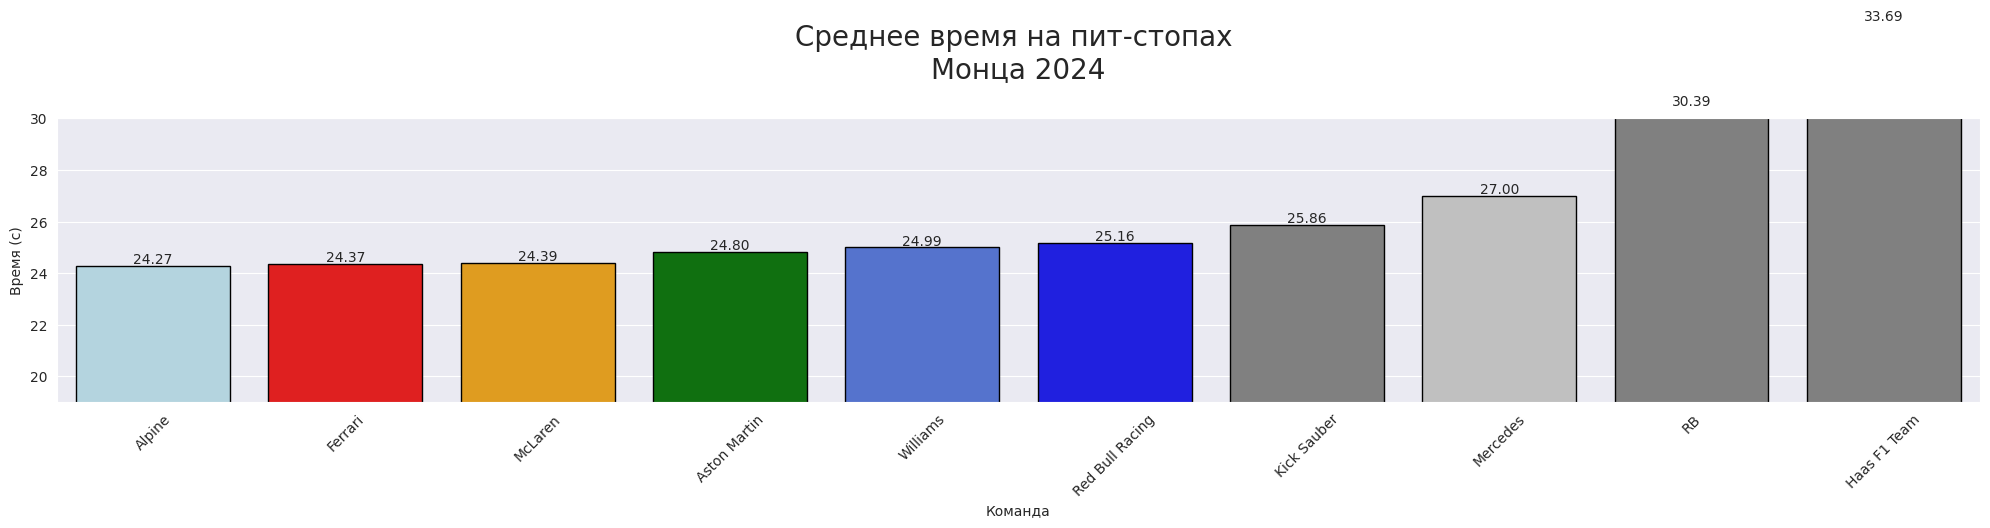

In [68]:
# Включаем кэш
fastf1.Cache.enable_cache('fastf1_cache')

# Загружаем данные о Гран-при Италии 2024 года (Монца)
race = fastf1.get_event(2024, 'Monza')

# Загружаем данные гоночной сессии
session = race.get_session('R')
session.load()

# Определяем цвета для каждой команды
team_colors = {
       'Ferrari': 'red',
    'McLaren': 'orange',
    'Red Bull Racing': 'blue',
    'Mercedes': 'silver',
    'Aston Martin': 'green',
    'Alpine': 'lightblue',
    'AlphaTauri': 'darkblue',
    'Williams': 'royalblue',
'Alfa Romeo': 'darkred',
    'Haas': 'black',
}


# Получаем все круги гонщиков
laps = session.laps

# Переходим к каждому кругу и извлекаем позицию каждого гонщика на каждом круге
positions = pd.DataFrame()

for drv in session.drivers:
    driver_laps = laps.pick_driver(drv)
    driver_laps['Driver'] = drv
    driver_laps['Team'] = driver_laps['Team']  # Добавляем данные о команде
    driver_positions = driver_laps[['LapNumber', 'Position', 'Driver', 'Team']]
    positions = pd.concat([positions, driver_positions])

# Агрегируем данные по пит-стопам
pitstop = session.laps.loc[
    (session.laps.LapNumber != 1.0) &
    (session.laps.PitInTime.combine_first(session.laps.PitOutTime).notnull()),
    ['Team', 'Driver', 'LapNumber', 'PitOutTime', 'PitInTime']
].sort_values(by=['Team', 'Driver', 'LapNumber']).reset_index()

# Вычисление времени, затраченного на каждый пит-стоп
pitstop['pittime'] = (pitstop.PitOutTime - pitstop.PitInTime.shift(1)).dt.total_seconds()

# Агрегирование данных по командам
pitstop_team_data = pitstop.groupby(['Team'])['pittime'].mean().sort_values().round(3)

# Создание палитры цветов для команд
color_palette = {team: team_colors.get(team, 'gray') for team in pitstop_team_data.index}

# Построение графика
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x=pitstop_team_data.index, y=pitstop_team_data.values, palette=color_palette, edgecolor='black')
plt.ylabel('Время (с)')
plt.xlabel('Команда')
plt.ylim(19, 30)

# Добавление подписей к столбцам
for i, value in enumerate(pitstop_team_data):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center')

plt.title(f'Среднее время на пит-стопах \nМонца 2024\n', fontsize=20)
plt.xticks(rotation=45)  # Поворот меток на оси X для улучшения читаемости
plt.tight_layout()

In [69]:
print(pitstop_team_data.index.unique())

Index(['Alpine', 'Ferrari', 'McLaren', 'Aston Martin', 'Williams',
       'Red Bull Racing', 'Kick Sauber', 'Mercedes', 'RB', 'Haas F1 Team'],
      dtype='object', name='Team')


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

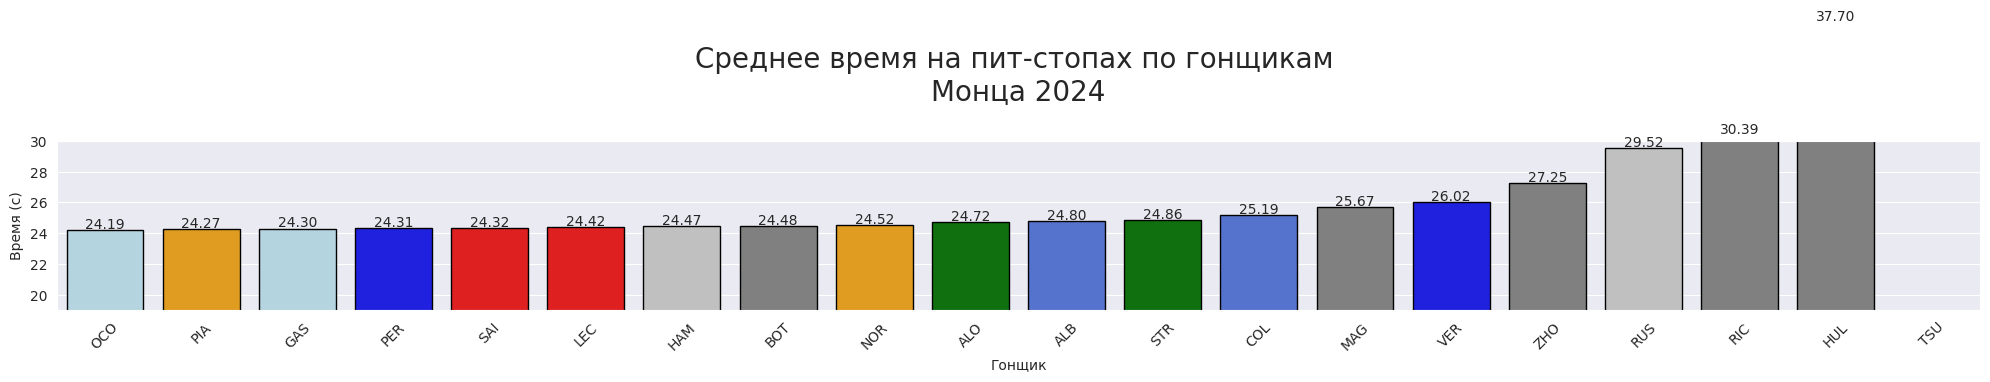

In [74]:

# Включаем кэш
fastf1.Cache.enable_cache('fastf1_cache')

# Загружаем данные о Гран-при Италии 2024 года (Монца)
race = fastf1.get_event(2024, 'Monza')

# Загружаем данные гоночной сессии
session = race.get_session('R')
session.load()

# Определяем цвета для каждой команды
team_colors = {
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Red Bull Racing': 'blue',
    'Mercedes': 'silver',
    'Aston Martin': 'green',
    'Alpine': 'lightblue',
    'AlphaTauri': 'darkblue',
    'Williams': 'royalblue',
    'Alfa Romeo': 'darkred',
    'Haas': 'black',
}

# Получаем все круги гонщиков
laps = session.laps

# Агрегируем данные по пит-стопам
pitstop = session.laps.loc[
    (session.laps.LapNumber != 1.0) &
    (session.laps.PitInTime.combine_first(session.laps.PitOutTime).notnull()),
    ['Team', 'Driver', 'LapNumber', 'PitOutTime', 'PitInTime']
].sort_values(by=['Team', 'Driver', 'LapNumber']).reset_index()

# Вычисляем время, затраченное на каждый пит-стоп
pitstop['pittime'] = (pitstop.PitOutTime - pitstop.PitInTime.shift(1)).dt.total_seconds()

# Группируем данные по каждому гонщику
pitstop_driver_data = pitstop.groupby(['Driver', 'Team'])['pittime'].mean().sort_values().round(3)

# Создание палитры цветов для гонщиков на основе их команд
color_palette = [team_colors.get(team, 'gray') for team in pitstop_driver_data.index.get_level_values('Team')]

# Построение графика
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x=pitstop_driver_data.index.get_level_values('Driver'), y=pitstop_driver_data.values, palette=color_palette, edgecolor='black')
plt.ylabel('Время (с)')
plt.xlabel('Гонщик')
plt.ylim(19, 30)

# Добавление подписей к столбцам
for i, value in enumerate(pitstop_driver_data):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center')

plt.title(f'Среднее время на пит-стопах по гонщикам \nМонца 2024\n', fontsize=20)
plt.xticks(rotation=45)  # Поворот меток на оси X для улучшения читаемости
plt.tight_layout()
plt.show()

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


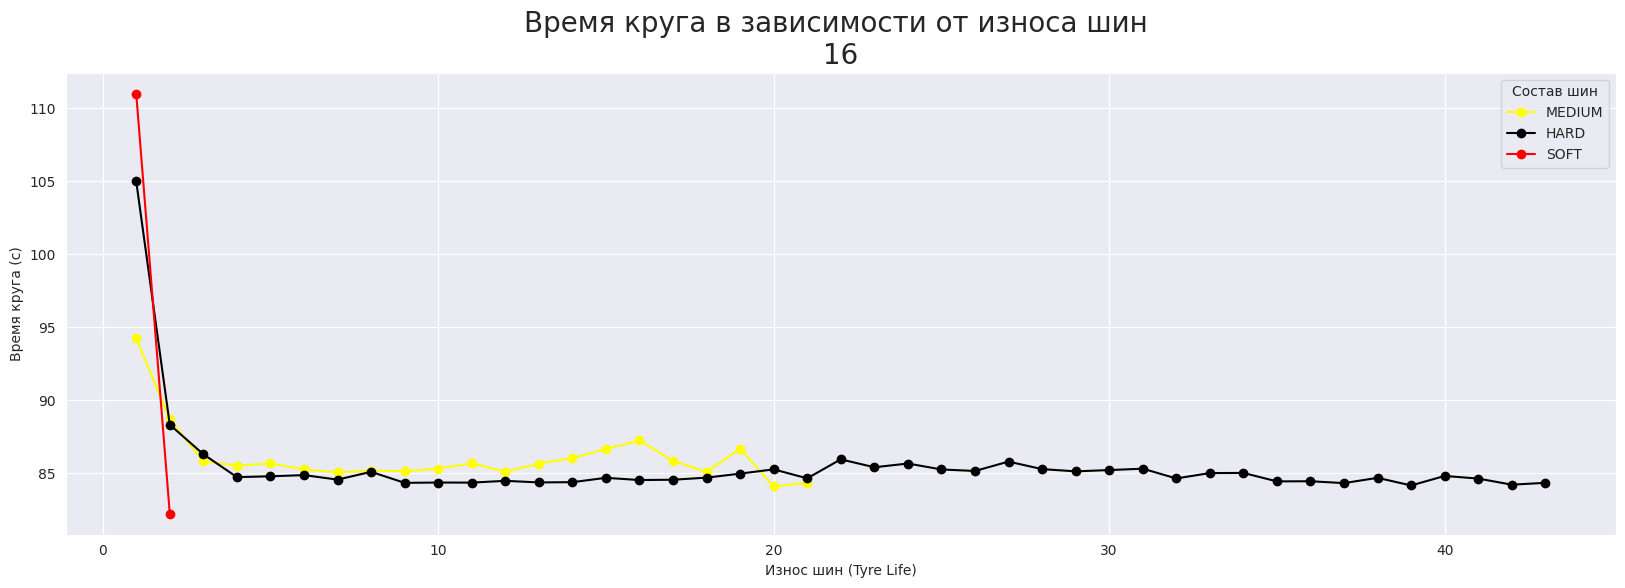

In [94]:
df = session.laps

# Выводим список столбцов для проверки их имен
print(df.columns)

# Получаем времена круга для каждого гонщика на каждом составе шин
# Только для выбранных кругов с нормальными условиями на треке (Track Status = 1)
plt.figure(figsize=(20, 6))

# Проверьте, что в DataFrame действительно есть столбец 'Compound'
if 'Compound' in df.columns:
    for compound in df['Compound'].unique():  # Перебираем каждый уникальный состав шин
        average_laptime_per_tyrelife = {}  # Словарь для хранения среднего времени круга по износу шин
        data_tyre = df[df['Compound'] == compound]  # Отфильтровываем данные для текущего состава шин

        # Для каждого значения износа шин (Tyre Life)
        for tyrelife in range(1, int(data_tyre['TyreLife'].max()) + 1):
            # Считаем среднее время круга при данных условиях трека и износе шин
            avg_laptime = data_tyre.loc[
                (data_tyre['TyreLife'] == tyrelife) & (data_tyre['TrackStatus'] == '1'),
                'LapTime'
            ].mean()

            # Convert Timedelta to seconds
            average_laptime_per_tyrelife[tyrelife] = avg_laptime.total_seconds()

        # Извлекаем ключи (износ шин) и значения (среднее время круга)
        key = list(average_laptime_per_tyrelife.keys())
        value = list(average_laptime_per_tyrelife.values())

        # This if statement was not indented properly
        if compound == 'HARD':
            color = 'black'  # Для HARD шин меняем цвет на черный
        elif compound == 'SOFT':
            color = 'red'  # Определяем цвет для шин SOFT
        else:
            color = 'yellow'  # Определяем цвет для шин MEDIUM

        # Строим график для текущего состава шин
        plt.plot(key, value, color=color, marker='o', label=compound)

    plt.ylabel('Время круга (с)')
    plt.xlabel('Износ шин (Tyre Life)')
    plt.title('Время круга в зависимости от износа шин \n' + str(race.name), fontsize=20)
    # # Если нет дождя, определяем лимиты для оси Y на основе медианы времени круга
    # if not rain:
    #     plt.ylim(df['LapTime'].median() - 3, df['LapTime'].median() + 3)

    # Добавляем легенду
    plt.legend(title="Состав шин")
    plt.show()

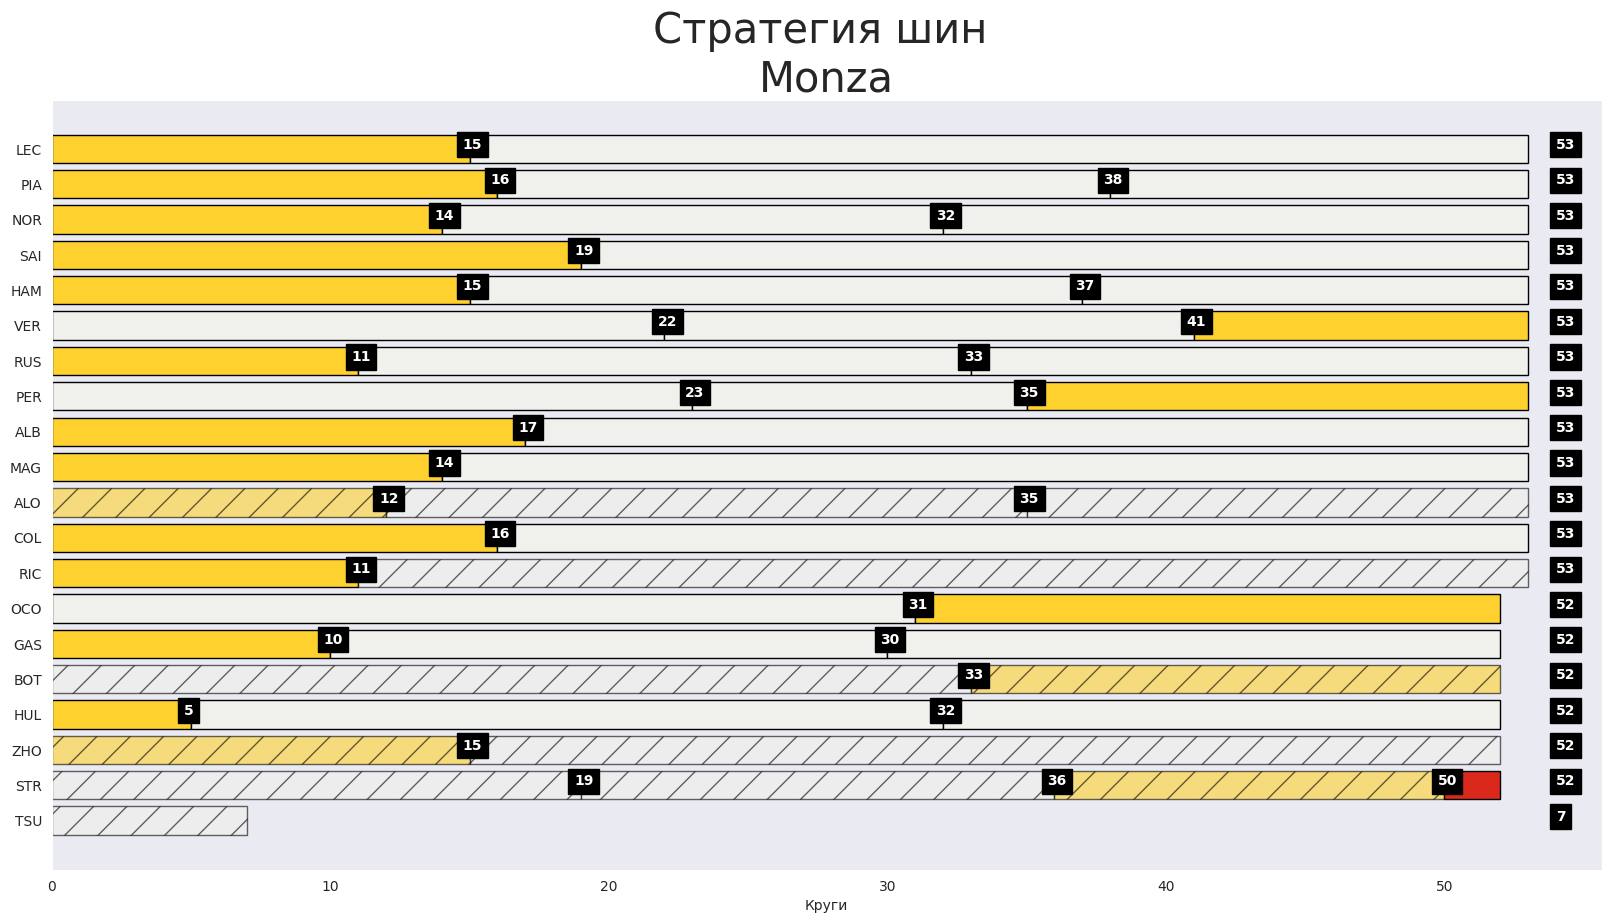

In [108]:
import fastf1
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))  # Создаем фигуру и оси для графика
plt.title('Стратегия шин \n' + race_name, fontsize=30)  # Устанавливаем заголовок графика
plt.xlabel('Круги')  # Устанавливаем подпись оси X
plt.grid(False)  # Отключаем сетку

# Получаем словарь цветов для разных составов шин
compound_color = fastf1.plotting.COMPOUND_COLORS

# Группируем данные по гонщику, стинту, составу шин и новизне шин
tyre_stint = df.groupby(['Driver', 'Stint', 'Compound', 'FreshTyre']).agg({'LapNumber': 'min', 'TyreLife': 'count'}).reset_index()

# Используем результаты гонки
for drv in list(results.Abbreviation)[::-1]:  # Перебираем гонщиков в обратном порядке
    driver_stints = tyre_stint[tyre_stint['Driver'] == drv]  # Фильтруем данные по текущему гонщику

    # Отрисовываем каждый стинт для текущего гонщика
    for idx, row in driver_stints.iterrows():
        plt.barh(
            y=drv,  # Сокращение гонщика по оси Y
            width=row["TyreLife"],  # Ширина бара - количество кругов
            left=max(row['LapNumber'] - 1, 0),  # Позиция на оси X - номер круга начала стинта
            color=compound_color.get(row.Compound, 'green'),  # Цвет стинта на основе состава шин
            edgecolor="black",  # Цвет границы бара
            alpha=0.6 if not row.FreshTyre else 1,  # Прозрачность для старых шин
            hatch='/' if not row.FreshTyre else None  # Штриховка для старых шин
        )

        # Добавляем номер круга начала стинта
        if not row['LapNumber'] <= 1.0:
            plt.text(row['LapNumber'] - 1.25, drv, round(row['LapNumber'] - 1),
                     fontweight='extra bold', backgroundcolor='black', color='white')

    # Добавляем общее количество кругов для гонщика на график
    plt.text(df.LapNumber.max() + 1, drv, driver_stints['TyreLife'].sum(),
             fontweight='extra bold', backgroundcolor='black', color='white')

# Показать график
plt.show()


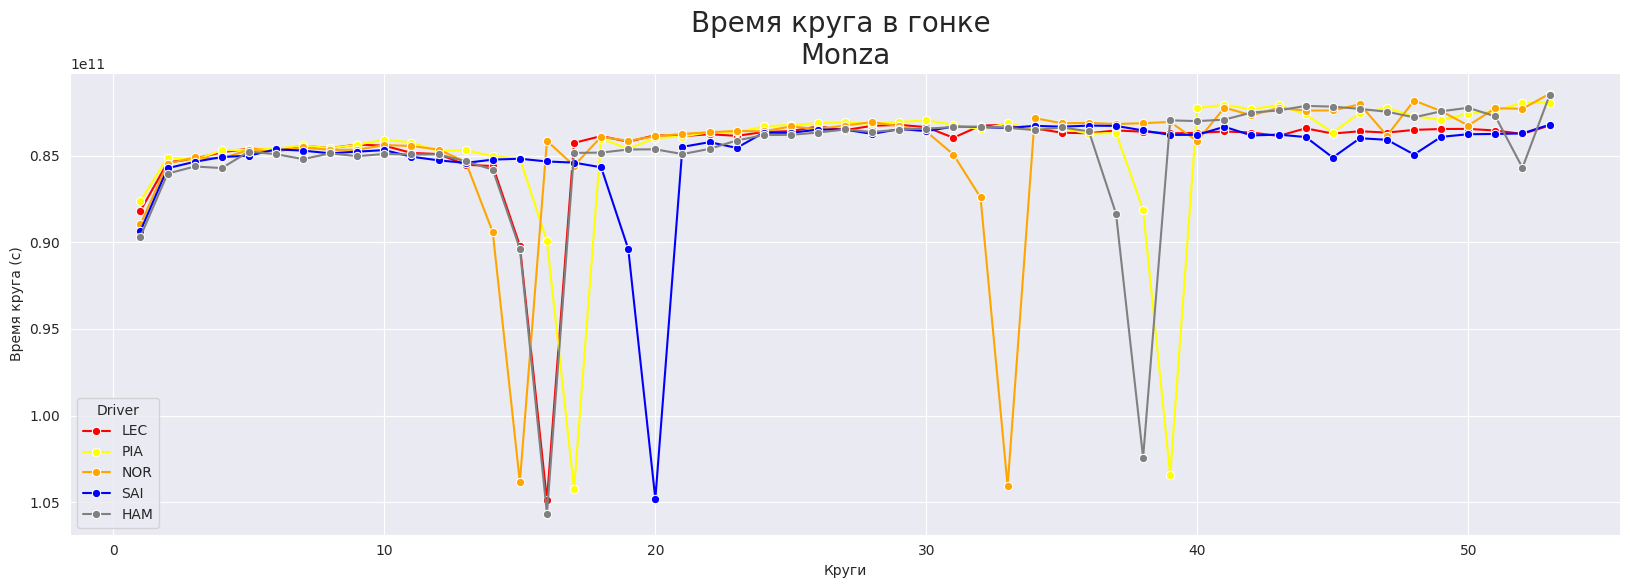

In [110]:
#Время круга для топ 5 гонщиков
# Топ 5 гонщиков (по финальным результатам гонки)
# Используем переменную 'results' вместо 'race.results'
top_5_drivers = list(results.Abbreviation.iloc[:5])

# data cleaning
df_top5 = df.loc[df.Driver.isin(top_5_drivers),['LapTime','LapNumber','Driver']]
df_top5 = df_top5.reset_index(drop=True)

#Словарь для топ 5 гонщиков
driver_color = {
    'LEC': 'red',
    'PIA': 'yellow',
    'NOR': 'orange',
    'SAI': 'blue',
    'HAM': 'grey'
}


plt.figure(figsize=(20,6))
sns.lineplot(df_top5, x=df_top5['LapNumber'], y=df_top5['LapTime'], marker = "o", hue=df_top5['Driver'], palette = driver_color)
plt.ylabel('Время круга (с)')
plt.xlabel('Круги')
plt.title('Время круга в гонке \n'+race_name,  fontsize=20)

# Set rain to False т к в этот день дождя не было
rain = False


plt.show()